In [1]:
import json
import numpy as np
import scipy.interpolate as spi

event_info = json.load(open("2025_fit_params.json", "r"))

In [20]:
splines = {'Men': [], 'Women': []}
for gender in event_info.keys():
    distance_list = []
    fit_list = []
    for event in event_info[gender].keys():
        run_event = event_info[gender][event]['Category'] in {'Sprints', 'Middle Distance', 'Long Distance'}
        outdoor = event_info[gender][event]['Surface'] == 'outdoor'
        if run_event and outdoor:
            distance_list.append(event_info[gender][event]['Distance'])
            fit_list.append(event_info[gender][event]['Fits'])
    fits = np.array(fit_list)
    for i in range(fits.shape[1]):
        splines[gender].append(spi.CubicSpline(distance_list, fits[:,i]))

In [21]:
# demonstrate how to compute the fit params for a given distance

dist = 3
gender = 'Men'
fits = [float(splines[gender][i](dist)) for i in range(len(splines[gender]))]
fits

[0.008150049932737524, -839.9938439225789, 0.5015204438013825]

In [22]:
time = 600
fits[0] * (time + fits[1])**2 + fits[2]

469.9203141559291

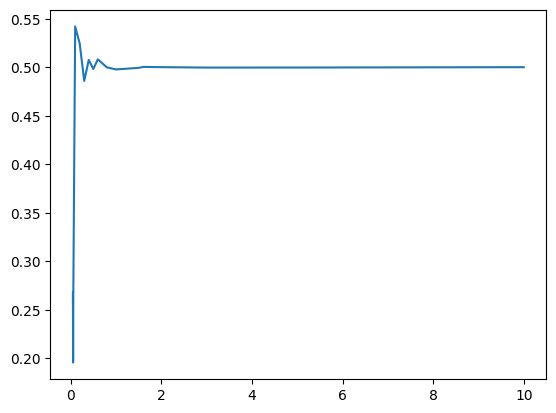

469.9203141559291

In [36]:
import matplotlib.pyplot as plt

splines = {'Men': [], 'Women': []}
for gender in event_info.keys():
    distance_list = []
    fit_list = []
    for event in event_info[gender].keys():
        run_event = event_info[gender][event]['Category'] in {'Sprints', 'Middle Distance', 'Long Distance'}
        outdoor = event_info[gender][event]['Surface'] == 'outdoor'
        if run_event and outdoor:
            distance_list.append(event_info[gender][event]['Distance'])
            fit_list.append(event_info[gender][event]['Fits'])
    fits = np.array(fit_list)
    for i in range(fits.shape[1]):
        splines[gender].append(spi.CubicSpline(distance_list, fits[:,i]))

plt.plot(distance_list, fits[:,2])
plt.show()

gender = 'Men'
fits = [float(splines[gender][i](dist)) for i in range(len(splines[gender]))]
time = 600
fits[0] * (time + fits[1])**2 + fits[2]

In [5]:
# Testing how well it works
import scipy.interpolate as spi

gender = 'Women'
surface = 'Track'
distance = 3.8
time = '19:45.6'

interp_points = []
for point in range(1400):
    distance_data = []
    time_data = []
    for event in restructured_points_table[gender][surface].keys():
        if not np.isnan(restructured_points_table[gender][surface][event]['Data'][point]):
            distance_data.append(restructured_points_table[gender][surface][event]['Distance'])
            time_data.append(restructured_points_table[gender][surface][event]['Data'][point])
    cs_fit = spi.CubicSpline(distance_data, time_data)
    interp_points.append(cs_fit(distance))
quad_fit = np.polyfit(interp_points, range(1,1401)[::-1], 2)
seconds = time_to_secs(time)
score = np.polyval(quad_fit, seconds)
print(int(score))

NameError: name 'restructured_points_table' is not defined

# Different Approach

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt

event_info = json.load(open("2025_fit_params.json", "r"))

(1400, 18)


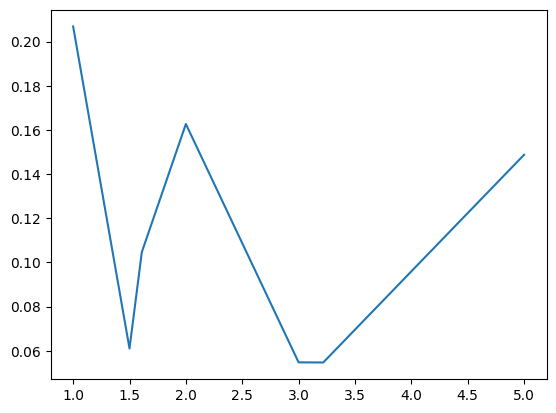

(1400, 18)


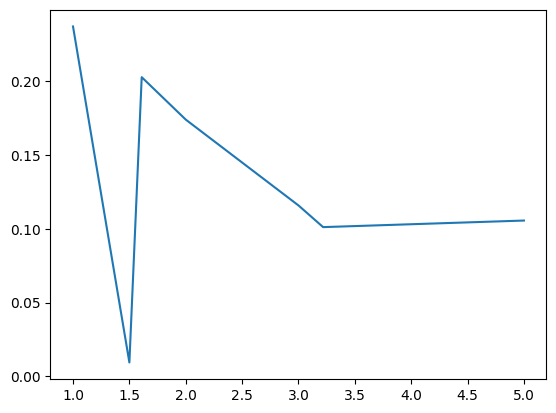

In [29]:
points = np.arange(1,1401)

for gender in event_info.keys():
    distance_list = []
    times = []
    for event in event_info[gender].keys():
        run_event = event_info[gender][event]['Category'] in {'Sprints', 'Middle Distance', 'Long Distance'}
        outdoor = event_info[gender][event]['Surface'] == 'outdoor'
        if run_event and outdoor:
            distance_list.append(event_info[gender][event]['Distance'])
            fits = event_info[gender][event]['Fits']
            times.append(np.sqrt((points - fits[2])/fits[0])-fits[1])
    times = np.array(times)
    distances = np.array(distance_list)
    pace = times.T / distances
    print(pace.shape)
    pts = 700
    cs = np.zeros(distances.shape[0] - 1)
    ks = np.zeros_like(cs)
    for i in range(distances.shape[0] - 1):
        cs[i] = np.log(pace[pts][i]/pace[pts][i+1])/np.log(distances[i]/distances[i+1])
        ks[i] = pace[pts][i]/(distances[i]**cs[i])

    # plt.plot(distances[-7:],pace[700][-7:])
    plt.plot(distances[-8:-1], cs[-7:])
    plt.show()

In [ ]:
splines = {'Men': [], 'Women': []}
for gender in event_info.keys():
    distance_list = []
    fit_list = []
    for event in event_info[gender].keys():
        run_event = event_info[gender][event]['Category'] in {'Sprints', 'Middle Distance', 'Long Distance'}
        outdoor = event_info[gender][event]['Surface'] == 'outdoor'
        if run_event and outdoor:
            distance_list.append(event_info[gender][event]['Distance'])
            fit_list.append(event_info[gender][event]['Fits'])
    fits = np.array(fit_list)
    for i in range(fits.shape[1]):
        splines[gender].append(spi.CubicSpline(distance_list, fits[:,i]))